### Стандартные импорты и настройки

In [1]:
from pprint import pprint

import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Scipy

Импортируем функции из библиотеки для кластеризации и векторного квантования.

https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.vq.html

In [2]:
from scipy.cluster.vq import whiten, kmeans2

### Подключаем API

Для примера используем открытое API, которое предоставляет данные о футбольных командах и матчах. 

http://api.football-data.org/docs/v1/index.html

Для полноценного использования лучше всего получить ключ, это довольно просто.

http://api.football-data.org/client/register

Для удобства зададим вспомогательный метод для обращения к API.

In [16]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, 
                            headers={'X-Auth-Token': 
                                     '0dfe6096ccd94946b7dbce0ee9ec77f0' })\
                                     .json()
        return json[result_key]
    except:
        #print(json)
        return json    

Получаем команды

In [17]:
team_quantity = call_api(
    'http://api.football-data.org/v1/competitions/446/?season=2016',
    'numberOfTeams')
teams = call_api(
    'http://api.football-data.org/v1/competitions/446/leagueTable?season=2016',
    'teams')



Готовим данные для трансформации в Pandas

In [18]:
team_for_pd = []
for i in range(team_quantity):
    team_for_pd.append({'teamname': teams['standing'][i]['teamName'], 
                        'losses': teams['standing'][i]['losses'], 
                        'marketvalue': np.random.randint(1000000000, size=1)[0]})
team_for_pd


[{'losses': 7,
  'marketvalue': 256212713,
  'teamname': 'Wolverhampton Wanderers FC'},
 {'losses': 10, 'marketvalue': 662984607, 'teamname': 'Cardiff City FC'},
 {'losses': 8, 'marketvalue': 273426714, 'teamname': 'Fulham FC'},
 {'losses': 11, 'marketvalue': 39011350, 'teamname': 'Aston Villa FC'},
 {'losses': 14, 'marketvalue': 335126016, 'teamname': 'Middlesbrough FC'},
 {'losses': 11, 'marketvalue': 827515207, 'teamname': 'Derby County'},
 {'losses': 11, 'marketvalue': 452187232, 'teamname': 'Preston North End'},
 {'losses': 12, 'marketvalue': 254606364, 'teamname': 'Millwall FC'},
 {'losses': 13, 'marketvalue': 999784819, 'teamname': 'Brentford FC'},
 {'losses': 17, 'marketvalue': 215363541, 'teamname': 'Sheffield United FC'},
 {'losses': 13, 'marketvalue': 445389539, 'teamname': 'Bristol City'},
 {'losses': 20, 'marketvalue': 138844810, 'teamname': 'Ipswich Town'},
 {'losses': 20, 'marketvalue': 961257753, 'teamname': 'Leeds United'},
 {'losses': 16, 'marketvalue': 440539220, 'te

Трансформируем

In [19]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,marketvalue,teamname
0,7,256212713,Wolverhampton Wanderers FC
1,10,662984607,Cardiff City FC
2,8,273426714,Fulham FC
3,11,39011350,Aston Villa FC
4,14,335126016,Middlesbrough FC
5,11,827515207,Derby County
6,11,452187232,Preston North End
7,12,254606364,Millwall FC
8,13,999784819,Brentford FC
9,17,215363541,Sheffield United FC


Отображаем

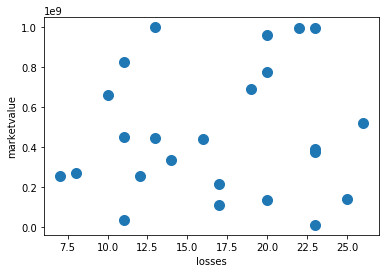

In [20]:
teams_pd.plot.scatter(x='losses', y='marketvalue', s=100)

Удаляем колонку с именами

In [8]:
del teams_pd['teamname']
teams_pd

,losses,marketvalue
0,7,744415833
1,10,57824219
2,8,217803255
3,11,234905031
4,14,486986576
5,11,515926150
6,11,865392134
7,12,854874949
8,13,707189504
9,17,796339773


Нормализация данных

In [9]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[1.25275497, 2.80634878],
       [1.78964996, 0.21798962],
       [1.43171997, 0.82108933],
       [1.96861495, 0.88556075],
       [2.50550994, 1.83587469],
       [1.96861495, 1.94497303],
       [1.96861495, 3.26241336],
       [2.14757995, 3.22276497],
       [2.32654495, 2.66601046],
       [3.04240493, 3.00209513],
       [2.32654495, 2.2311576 ],
       [3.57929992, 0.84869808],
       [3.57929992, 2.59822775],
       [2.86343993, 3.38530095],
       [3.04240493, 0.85717383],
       [3.57929992, 0.90510747],
       [4.11619491, 2.41252208],
       [3.40033492, 1.90396239],
       [4.65308989, 3.47133841],
       [3.93722991, 3.08622999],
       [4.11619491, 1.38605177],
       [4.11619491, 2.44068589],
       [4.4741249 , 2.84343421],
       [4.11619491, 0.54647914]])

Сделаем 3 кластера

In [10]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[3.84774741, 2.9049793 ],
        [1.68227096, 1.3351923 ],
        [3.00986584, 1.78779034]]),
 array([1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
        0, 2]))

Зададим цвета для каждого кластера

In [11]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'g',
 'g',
 'g',
 'b',
 'g',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b']

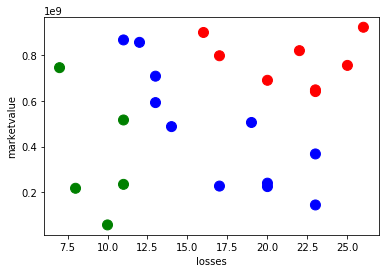

In [12]:
teams_pd.plot.scatter(x='losses', y='marketvalue', c=colors, s=100)

Теперь попробуем сделать больше кластеров.

In [13]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[3.84774741, 2.9049793 ],
        [2.07088067, 2.56707756],
        [3.57929992, 0.78936463],
        [1.72999496, 0.64154657],
        [3.75826491, 1.64500708]]),
 array([1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 4, 0, 0, 4, 0,
        0, 2]))

In [14]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'y',
 'y',
 'y',
 'g',
 'g',
 'g',
 'g',
 'g',
 'r',
 'g',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'm',
 'r',
 'r',
 'm',
 'r',
 'r',
 'b']

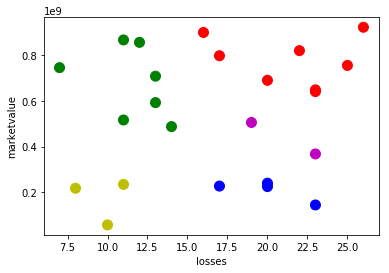

In [15]:
teams_pd.plot.scatter(x='losses', y='marketvalue', c=colors, s=100)